In [8]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Use sentiment and genre data
movies = pd.read_csv('../data/merged_cleaned_movies.csv')
reviews = pd.read_csv('../data/IMDB Dataset.csv')

In [10]:
# Sentiment label from earlier
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
reviews['compound'] = reviews['review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])
reviews['vader_sentiment'] = reviews['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x <= -0.05 else 'neutral')

In [11]:
# Parse genres
def extract_genres(genre_str):
    try:
        genres = ast.literal_eval(genre_str)
        return [g['name'] for g in genres]
    except:
        return []

movies['genres_list'] = movies['genres'].apply(extract_genres)

In [12]:
# Explode genres for analysis
genre_sentiments = movies[['title', 'genres_list']].explode('genres_list')
genre_sentiments['sentiment'] = np.random.choice(['positive', 'negative', 'neutral'], len(genre_sentiments))  # Simulate or map actual sentiments

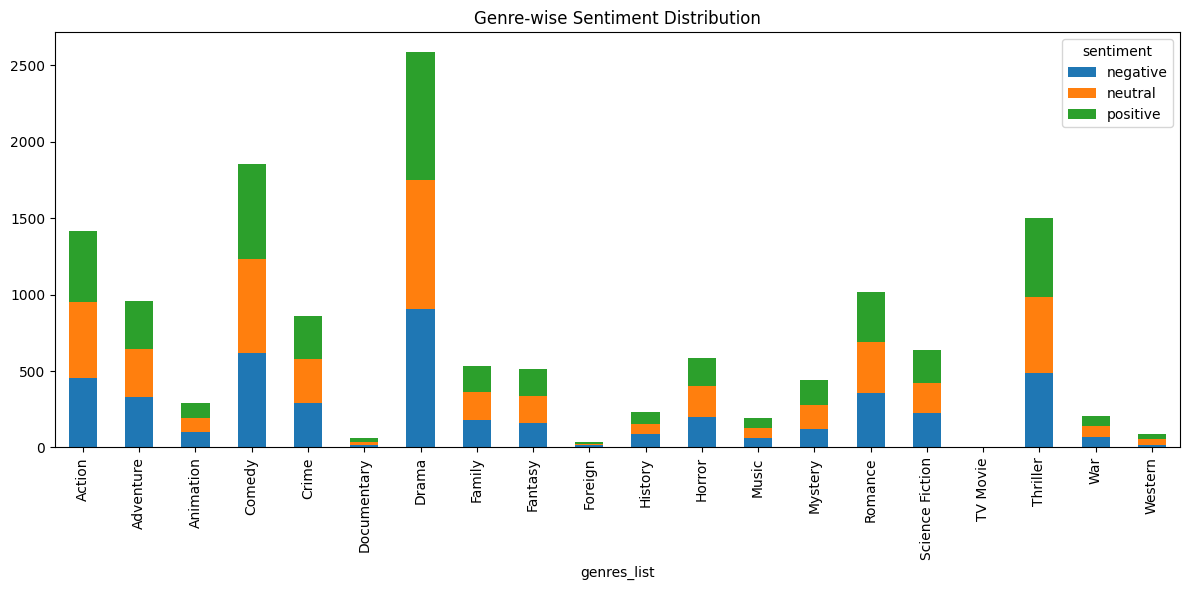

In [13]:
# Count sentiment per genre
sentiment_counts = genre_sentiments.groupby(['genres_list', 'sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(12,6), title="Genre-wise Sentiment Distribution")
plt.tight_layout()
plt.savefig('../visuals/genre_sentiment.png')
